In [642]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [643]:
df = pd.read_csv("https://raw.githubusercontent.com/RajathInuganti/Stocks/main/dataset/stocks/AAL.csv")

In [644]:
df = df.dropna()
df = df[['Date','Open', 'High', 'Low','Close']]
df.head()

,Date,Open,High,Low,Close
0,2005-09-27,21.049999,21.400000,19.100000,19.299999
1,2005-09-28,19.299999,20.530001,19.200001,20.500000
2,2005-09-29,20.400000,20.580000,20.100000,20.209999
3,2005-09-30,20.260000,21.049999,20.180000,21.010000
4,2005-10-03,20.900000,21.750000,20.900000,21.500000


In [645]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close
0,2005-09-27,21.049999,21.400000,19.100000,19.299999
1,2005-09-28,19.299999,20.530001,19.200001,20.500000
2,2005-09-29,20.400000,20.580000,20.100000,20.209999
3,2005-09-30,20.260000,21.049999,20.180000,21.010000
4,2005-10-03,20.900000,21.750000,20.900000,21.500000


In [646]:
stockdf = df[['Date','Close']]
print(stockdf.shape)

(3653, 2)


In [647]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
stock_copy = stockdf.copy()
stockdf = df[['Close']]
scaler=StandardScaler()
stockdf=scaler.fit_transform(np.array(stockdf).reshape(-1,1))
print(stockdf.shape)

(3653, 1)


In [648]:
# Import required libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(stockdf, test_size=0.3, shuffle=False)

# Print the shape of the training and testing sets
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)



train_data:  (2557, 1)
test_data:  (1096, 1)


In [649]:
def generate_input_target(data, k=1):
    X, Y = [], []
    for i in range(len(data)-k-1):
        a = data[i:i+k, 0]
        #Input values
        X.append(a) 
        #Target Values
        Y.append(data[i + k, 0])
    return np.array(X), np.array(Y)

**KNN Algorithm**

In [650]:
from sklearn.model_selection import GridSearchCV
X_train, y_train = generate_input_target(train_data)
X_test, y_test = generate_input_target(test_data)
# Define a grid of values for the 'k' parameter
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Create a KNeighborsRegressor object
neighbor = neighbors.KNeighborsRegressor(metric='euclidean')

# Create a GridSearchCV object and specify the parameter grid to search over
grid_search = GridSearchCV(neighbor, param_grid={'n_neighbors': k_values})

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best value of 'k' found by the grid search
print("Best value of k: ", grid_search.best_params_['n_neighbors'])

bestK = grid_search.best_params_['n_neighbors']

X_train, y_train = generate_input_target(train_data,bestK)
X_test, y_test = generate_input_target(test_data,bestK)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

Best value of k:  12
X_train:  (2544, 12)
y_train:  (2544,)
X_test:  (1083, 12)
y_test (1083,)


The KNN algorithm does not work well with large datasets. The cost of calculating the distance between the new point and each existing point is huge, which degrades performance.

In [651]:
from sklearn import neighbors
neighbor = neighbors.KNeighborsRegressor(n_neighbors = bestK,  metric='euclidean')
neighbor.fit(X_train, y_train)
pred = neighbor.predict(X_test)
print(neighbor.score(X_test, y_test))

0.9710721461115851


In [652]:
train_pred=neighbor.predict(X_train)
test_pred=neighbor.predict(X_test)

train_pred = train_pred.reshape(-1,1)
test_pred = test_pred.reshape(-1,1)

print("Train data prediction:", train_pred.shape)
print("Test data prediction:", test_pred.shape)

Train data prediction: (2544, 1)
Test data prediction: (1083, 1)


In [653]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

**RMSE, MSE and MAE**

In [654]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Train dataset: ")
print("RMSE: ", math.sqrt(mean_squared_error(ytrain,train_pred)))
print("MSE: ", mean_squared_error(ytrain,train_pred))
print("MAE: ", mean_absolute_error(ytrain,train_pred))
print("Test dataset: ")
print("RMSE: ", math.sqrt(mean_squared_error(ytest,test_pred)))
print("MSE: ", mean_squared_error(ytest,test_pred))
print("MAE: ", mean_absolute_error(ytest,test_pred))

Train dataset: 
RMSE:  0.9841661095903026
MSE:  0.9685829312661114
MAE:  0.6373817410624627
Test dataset: 
RMSE:  1.4840053122843144
MSE:  2.2022717668880656
MAE:  1.1133371971320578


**Graph**

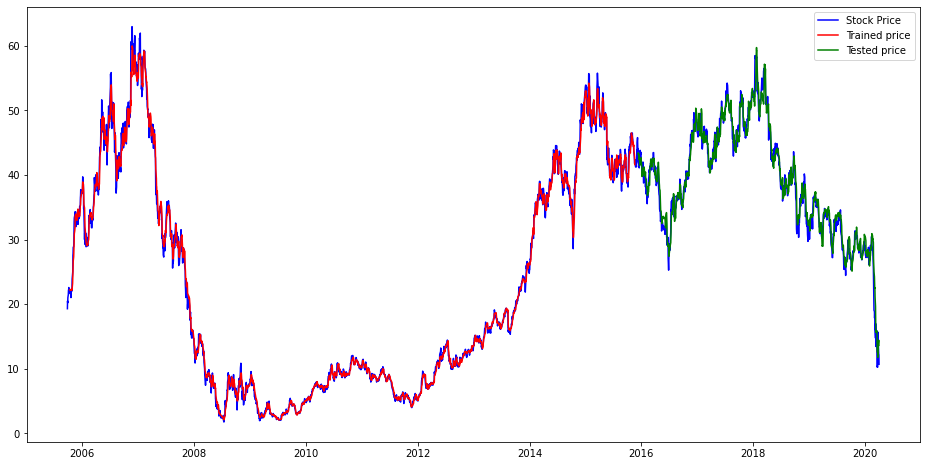

In [655]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the original data
plt.plot(stock_copy['Date'], stock_copy['Close'],'b', label='Stock Price')

# Plot the training data
plt.plot(stock_copy['Date'][bestK:len(train_pred)+bestK], train_pred,'r', label='Trained price')

# Plot the testing data
plt.plot(stock_copy['Date'][len(train_pred)+(bestK*2)+1:len(stockdf)-1], test_pred,'g', label='Tested price')

# Add a legend
plt.legend()

# Show the plot
plt.show()